# Come I will tell you a story about happy land

### Author: Marta Fajlhauer

In this article I want to show you the beginner stage of analysing data to find an answer for a question that we would like to ask. Maybe more genrally how to test a hypothesis. My hypothesis will be: This World is not as happy as it seems. There is a huge difference between rich and poor countries. I am very sorry for being pessimistic, but I would prefer call myself more realistic, rather than pesymistic. I would really like to be wrong as I think that all people no matter of origin, colour of skin, religion, or anything else should have the same opportunities. However, knowledge that this is not always true can help in reducing the problem.

Data sets that I will be using to investigate the problem will be data for World Happiness Record avaiable to download from Kaggle website: https://www.kaggle.com/unsdsn/world-happiness. I will start from analysing each of them individually starting from 2015 dataset and later on I will join them together. Each of the World Happiness records is an example of cross-sectional study, which means that it captures a snapshot of a group at a point of time. On the other hand, later on we will join all three reports and compare them together as time series recorded annually. This is a longitudinal study, which observes a group repeatedly over a period of time. 

Let start from importing required packages into the Jupyter notebook:

In [1]:
%matplotlib inline

In [2]:
import os, sys
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns

Using package os I will check if I am in a good directory to write a downloaded dataset into the jupyter notebook from my local directory. After that I will use panda to read the csv file in Python. 

In [3]:
os.getcwd()

'C:\\Users\\fajlh\\OneDrive\\Documents\\GitHub\\World_Happiness_record'

In [4]:
df=pd.read_csv('2015.csv')

Now I want to see the data set. I have 3 categorical variables such as: Country, Region, Happiness Rank. Rest of the variables are continuous variables. 

From the World Happiness Record 2015 document we know that: 


* Health (Life Expectancy) Average life evaluations, where 0 represents the worst possible life and 10 the best possible.


* Freedom perceived freedom to make life decisions


* Trust (Government Corruption) measured by a perceived absence of corruption in government and business


* Generosity as measured by recent donations, adjusted for differences in income 


* Dystopia Residual


Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favourably compared (no country performs more poorly than Dystopia). Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support.
The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country. The Dystopia Residual metric actually is the Dystopia Happiness Score (1.85) + the Residual value or the unexplained value for each country as stated in the previous answer.

In [5]:
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


I want to quickly see summary statistics as well as check distribution of each variable in the dataset to estimate underlying problems in each of them. However, I don't want to find summary statistics for categorical data as it would be useless. I use a functin del to delate the Happiness Rank from summary statistics. 

In [6]:
summary = df.describe()
del summary['Happiness Rank']
summary

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


Just quick look before drawing histogram and density plot and we see that the data is the most spread out for Happiness Score. For most of variables minimal value is 0 or close to 0 except for the happiness score. Great! There is no country that is completely devasted. Now, let's quickly see some of distribution plots, but I will show only the most interesting one and if you want you can check it for rest of them. 

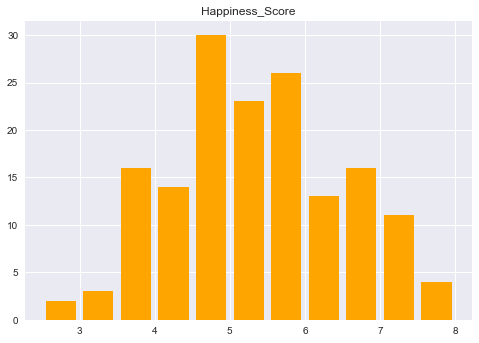

In [7]:
bins = [2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0]
plt.hist(df["Happiness Score"], bins, histtype="bar", rwidth=0.8, color = "orange")
plt.title("Happiness_Score")

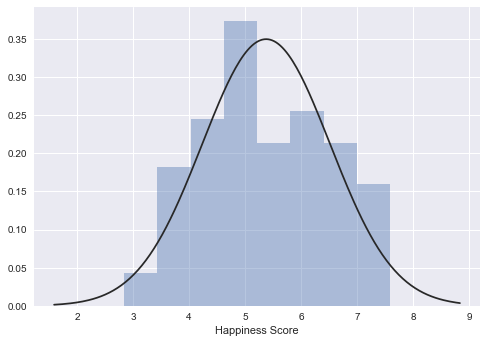

In [8]:
sns.distplot(df["Happiness Score"] , kde=False, fit=stats.norm)

We would expected to have approximately Gaussian distribution (normal as you like) due to the fact that there is not many people that we can find that are extremely happy or unhappy.From the histogram and the density plot for the feature (variable as you like) we can see that it is right skewed Gaussian distribution. with mode interval (4.5-5.0) and mean 5.38  

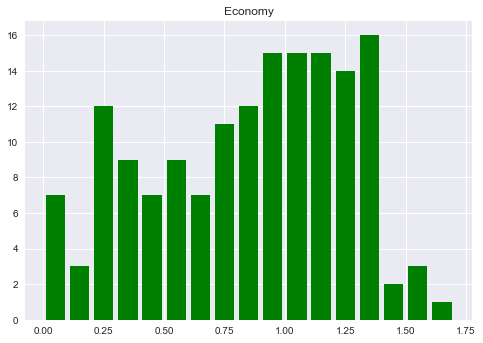

In [9]:
bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7]
plt.hist(df["Economy (GDP per Capita)"], bins, histtype="bar", rwidth=0.8, color="green")
plt.title("Economy")

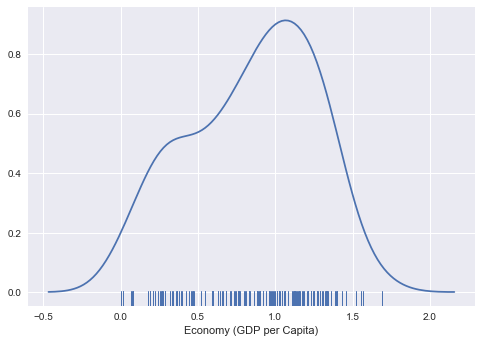

In [10]:
sns.distplot(df["Economy (GDP per Capita)"] , hist=False, rug=True)

Going back to my question that I asked on the beginning we can see that there is a huge difference of GDP between "rich" and "poor" countries. We can see that there is only a small number of the richest countries in the world (with the higest GDP index). There is less than 8 countries with the minimum GDP per capita. For now we can just guess that those countries are in Subsaharan Africa. Worth to investigate further.

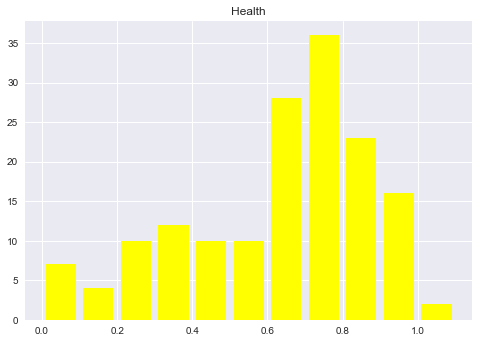

In [11]:
bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1]
plt.hist(df["Health (Life Expectancy)"], bins, histtype="bar", rwidth=0.8, color="yellow")
plt.title("Health")

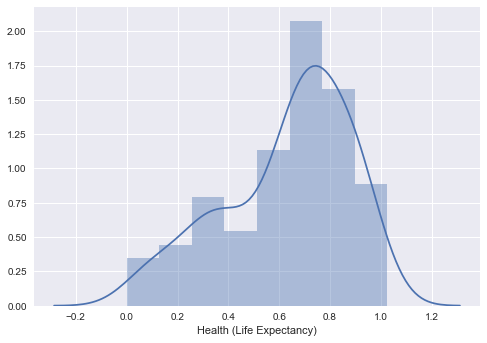

In [12]:
sns.distplot(df["Health (Life Expectancy)"] , hist=True, rug=False)

We can expect that countries with high GDP per capita will have higher level of life expectancy. More money available for treatment and better living conditions. That's why only a few countries are in the highest interval for life expectancy. So rich people live longer? This is right skewed distribution with mode interval (0.7-0.8). 

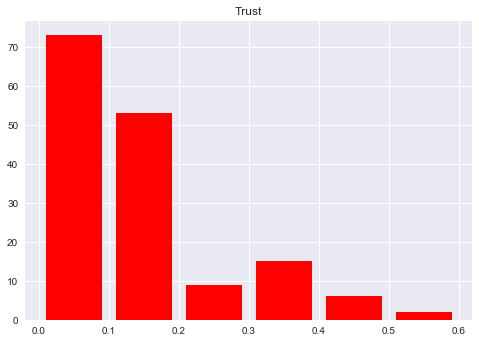

In [13]:
bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
plt.hist(df["Trust (Government Corruption)"], bins, histtype="bar", rwidth=0.8, color="red")
plt.title("Trust")

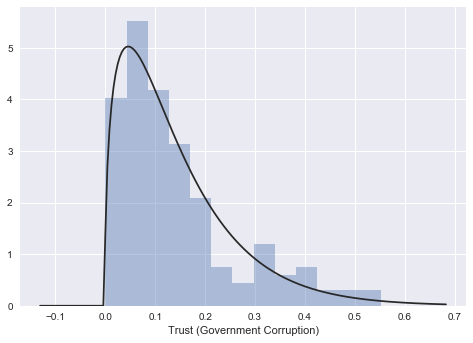

In [14]:
sns.distplot(df["Trust (Government Corruption)"] , kde=False, fit=stats.gamma)

Always approaching analyses think behind the numbers. Go back to the orginal question and you can see the connection. I would expect to see that the trust in government is correlated with the GDP per capita and life expectancy. Happy, heatlhy peaople believe in a good will of government. 


Interesting is the fact that so many countries do not trust in good will of government. 

And the last variable that I want to show you, but please feel free to investigate all of them and think what the given numbers tell you. Those are not only numbers there is always a story behind it. 

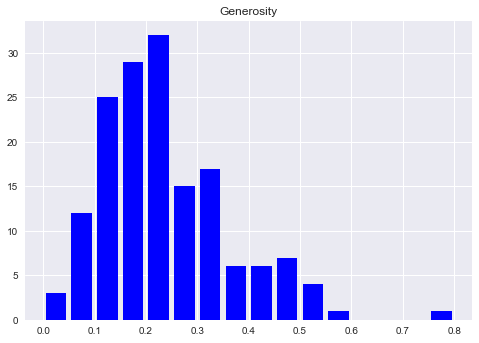

In [15]:
bins = [0, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50, 0.55, 0.60, 0.65, 0.70, 0.75, 0.80 ]
plt.hist(df["Generosity"], bins, histtype="bar", rwidth=0.8, color="blue")
plt.title("Generosity")

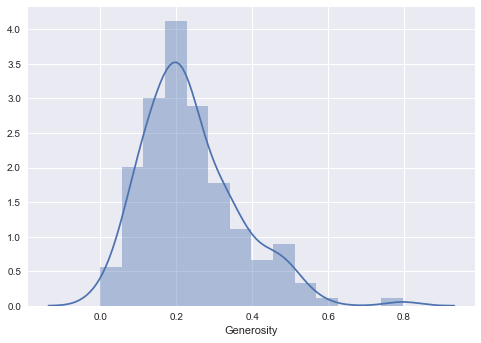

In [16]:
sns.distplot(df["Generosity"] , hist=True, rug=False)

Generosity was measured by recent donations, adjusted for differences in income. 

The highest interval represents small number of countries. Either people living in this country are rich and give massive donations or poor people seemes to support each other in a bad time. I would like to see that this is the second one. 

But maybe that's an outlier? 

In [17]:
visualise = df[['Country', 'Region', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity']]

In [18]:
grouped_region = visualise.groupby('Region')
grouped_region.mean()

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
Region,,,,,,
Australia and New Zealand,1.291880,1.314450,0.919965,0.645310,0.392795,0.455315
Central and Eastern Europe,0.942438,1.053042,0.718774,0.358269,0.086674,0.152264
Eastern Asia,1.151780,1.099427,0.877388,0.462490,0.127695,0.225885
Latin America and Caribbean,0.876815,1.104720,0.703870,0.501740,0.117172,0.217788
Middle East and Northern Africa,1.066973,0.920490,0.705616,0.361751,0.181702,0.190375
North America,1.360400,1.284860,0.883710,0.589505,0.244235,0.429580
Southeastern Asia,0.789054,0.940468,0.677357,0.557104,0.151276,0.419261
Southern Asia,0.560486,0.645321,0.540830,0.373337,0.102536,0.341429
Sub-Saharan Africa,0.380473,0.809085,0.282332,0.365944,0.123878,0.221137


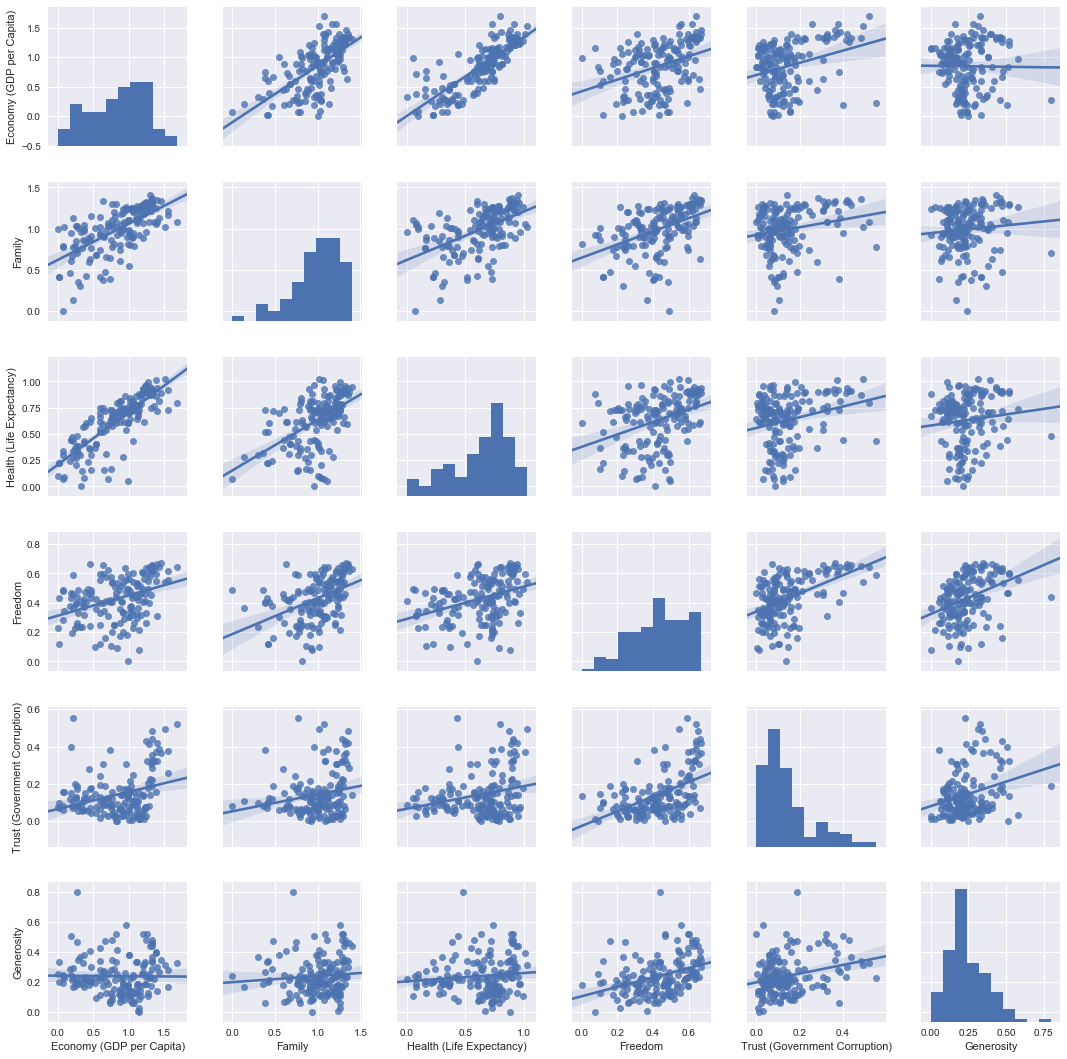

In [19]:
sns.pairplot(visualise, kind='reg')

Quick look on the scatter plot. From this scatterplot we can distinguish two needs for citizens of the world: 
* financial 

Financial needs result in positive linear relationship between Economy (GDP per Capita) Family and Health. As we suspected before. Of course, higher GDP means more money for health which results in assurance for parents that they will be able to afford meet needs of their children.
* psychological. 
 
Psychological needs results in positive linear relationship between Freedom, Trust and Generosity. If we Trust in good will of government then we we feel free to make independent decisions. Securing psychological needs results in willingness to share goods with others. 

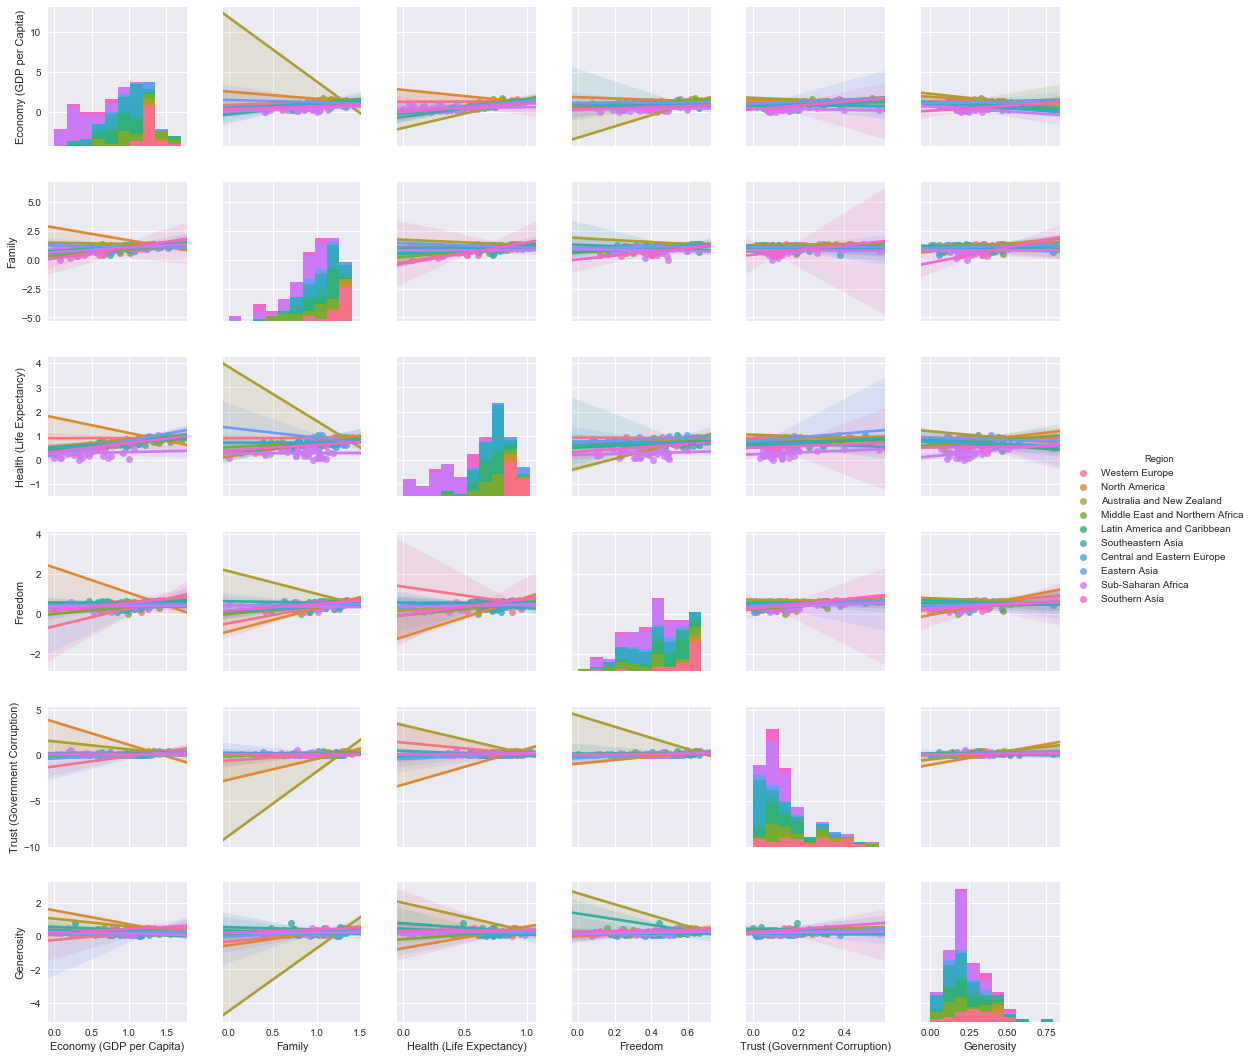

In [20]:
sns.pairplot(visualise, kind='reg', hue="Region")

Quick look on the scatterplots grouped by Region reveal that Australia and New Zealand citizens do not follow the same pattern. There is a negative linear relationship between Economy and Family. Does it mean that Australia should become poor to have more citizens or maybe Australian people they just don't want to have children any more? We can observe also negative linear relationship between Health and Family. Does it mean that Healthy people don't want to have children? Of course not! This is an example of correlation does not imply causation. 
Similarly North America citizens. Most of variables are negatively related with Economy GDP. It seems like even if the country is doing economically well and people are generally happy there they don't want to have a children. What can be underlying problem? 